In [20]:
from envs.blackjack_env import BlackjackEnv
from poker_cards import CARD_DECK, CARD_VALUES
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
## Initialize 
n_decks = 1
env = BlackjackEnv()
Q = np.zeros((32, 2, 12, env.action_space.n))
gamma = 1
alpha = 0.1
epsilon = 1
epsilon_decay = 0.99
min_epsilon = 0.05

In [22]:
## Functions
def update_q_table(state, action, reward, next_state): # state is a dict
    # extract and unpack obs
    a, b, c = list(state.values())          # own_hand_value, usable_ace, dealer_upcard
    na, nb, nc = list(next_state.values())

    # update table
    old_value = Q[a, b, c, action]
    next_max = max(Q[na, nb, nc])
    Q[a, b, c, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

def epsilon_greedy(state):
    # implement the condition to explore
    if np.random.rand() < epsilon:
      	# choose a random action
        action = env.action_space.sample()
    else:
      	# choose the best action according to Q
        a, b, c = list(state.values())
        action = np.argmax(Q[a, b, c])
    return action

In [23]:
## Training loop
n_episodes = 100000
episode_returns = []

for episode in range(n_episodes):
    state, info = env.reset()
    episode_reward = 0
    terminated = False

    while not terminated:
        action = np.argmax(Q)
        new_state, reward, terminated, truncated, info = env.step(action)
        update_q_table(state, action, reward, new_state)
        state = new_state

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    episode_returns.append(reward)

IndexError: index 976 is out of bounds for axis 3 with size 2

In [ ]:
def print_policy(Q):
    for usable_ace in [0, 1]:
        print(f"\nUsable Ace = {usable_ace}")
        print("Player↓ | Dealer→")
        print("           2 3 4 5 6 7 8 9 10 A")
        print("-" * 40)
        for player_value in range(4, 22):  # common range
            row = f"{player_value:>3}      | "
            for dealer_up in range(10):  # index 0..9
                action = np.argmax(Q[player_value, usable_ace, dealer_up])
                symbol = "H" if action == 1 else "S"
                row += symbol + " "
            print(row)

print_policy(Q)


Usable Ace = 0
Player↓ | Dealer→
           2 3 4 5 6 7 8 9 10 A
----------------------------------------
  4      | S S H H H H H H H H 
  5      | S S H H H H H H H H 
  6      | S S H H H H H H H H 
  7      | S S H H H H H H H H 
  8      | S S H H H H H H H H 
  9      | S S H H H H H H H H 
 10      | S S H H H H H H H H 
 11      | S S H H H H H H H H 
 12      | S S S S H H H H S H 
 13      | S S S S S H S H S H 
 14      | S S H S S H S H S S 
 15      | S S S H H H H H S H 
 16      | S S S H S S S H S H 
 17      | S S H S S S S S H S 
 18      | S S S S S S S S S H 
 19      | S S S S S S S S S S 
 20      | S S S S S S S S S S 
 21      | S S S S S S S S S S 

Usable Ace = 1
Player↓ | Dealer→
           2 3 4 5 6 7 8 9 10 A
----------------------------------------
  4      | S S S S S S S S S S 
  5      | S S S S S S S S S S 
  6      | S S S S S S S S S S 
  7      | S S S S S S S S S S 
  8      | S S S S S S S S S S 
  9      | S S S S S S S S S S 
 10      | S S S S

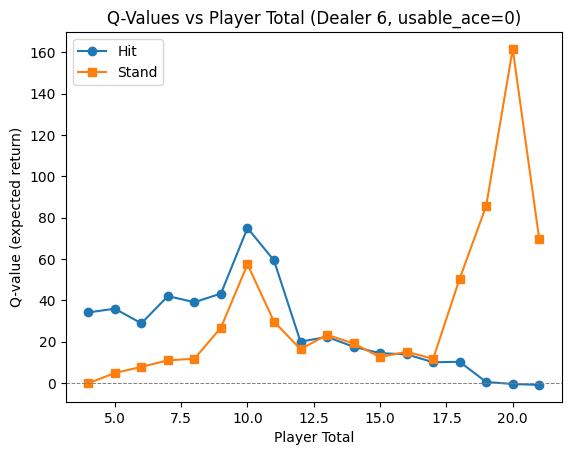

In [ ]:
## Comparison

n_episodes = 100000

def trained_policy(Q):
    episode_returns = 0

    for episode in range(n_episodes):
        state, info = env.reset()
        episode_reward = 0
        terminated = False

        while not terminated:
            own_hand_value, usable_ace, dealer_upcard = list(state.values())
            action = np.argmax(Q[own_hand_value, usable_ace, dealer_upcard])
            new_state, reward, terminated, truncated, info = env.step(action)
            state = new_state

        episode_returns += reward
    
    return episode_returns / n_episodes

def random_policy():
    episode_returns = 0

    for episode in range(n_episodes):
        state, info = env.reset()
        episode_reward = 0
        terminated = False

        while not terminated:
            own_hand_value, usable_ace, dealer_upcard = list(state.values())
            action = env.action_space.sample()
            new_state, reward, terminated, truncated, info = env.step(action)
            state = new_state

        episode_returns += reward
    
    return episode_returns / n_episodes

trained_returns = trained_policy(Q)
random_returns = random_policy()

print(trained_returns, random_returns)